In [117]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [118]:
iris_df = pd.read_csv('iris.data', delimiter=',', 
                 names = ['sepal length', 'sepal width', 'petal length', ' petal width','species'] )
iris_df.head(2)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [119]:
iris_df = iris_df.dropna(axis=0) #drop missing

In [120]:
#do label enconding in target attribute: species
label_encoder = preprocessing.LabelEncoder() 
iris_df['species']= label_encoder.fit_transform(iris_df['species']) 

iris_df['species'].unique()

array([0, 1, 2])

In [121]:
iris_df.head(2)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [122]:
y = iris_df.species

In [123]:
X = iris_df.drop(['species'], axis=1)
X.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [124]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

<h3>Decision tree</h3>

In [125]:
decision_tree_model = DecisionTreeClassifier(random_state=1)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<h4>ACC score</h4>

In [126]:
y_pred_d_tree= decision_tree_model.predict(X_valid)
print(accuracy_score(y_valid, y_pred_d_tree))

1.0


In [127]:
"""ROC AUC:AFTER"""

'ROC AUC:AFTER'

<h3>SVM</h3>

In [128]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

<h4>ACC score</h4>

In [129]:
y_pred_svm = svm_model.predict(X_valid)
print(accuracy_score(y_valid, y_pred_svm))

1.0


<h3>SGD</h3>

In [130]:
sgd_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
sgd_model.fit(X_train, y_train)

SGDClassifier(max_iter=50)

<h4>ACC score</h4>

In [131]:
y_pred_sgd = sgd_model.predict(X_valid)
print(accuracy_score(y_valid, y_pred_sgd))

1.0


<h3>Decision tree for feature importance</h3>

In [132]:
model = DecisionTreeClassifier()

In [133]:
#test with all data
model.fit(X, y)

DecisionTreeClassifier()

In [134]:
#get importance
importance = model.feature_importances_

In [135]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01333
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.56406
Feature: 3, Score: 0.42261


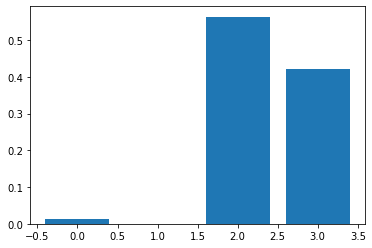

In [136]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<p>As features mais importantes são as dimensões da pétala, sendo <b>'petal length'</b> com enorme importância seguida por, bem abaixo, <b>'petal width'</b></p>

AUC ROC CURVE https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/